In [1]:
import Regression as Reg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(123456)

**Для теста класса Regression воспользуемся данными по кол-вy прокатов велосипедов**

## Линейная регрессия

In [3]:
data = pd.read_csv('data/bikes_rent.csv')

In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
data.drop(['cnt'], axis=1).corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489


**Сразу уберем линейно зависимый признак windspeed(ms), 
чтобы матрица объект-признак была полного ранга и обучем линейную регресию с параметрами по умолчанию.**

In [6]:
X_train = data.drop(['cnt', 'windspeed(ms)'], axis=1).to_numpy()
Y_train = data['cnt'].to_numpy()

In [7]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [8]:
%%time
#(fit_intercept=True, solver='gd', penalty ='none', alpha=1, eta=1e-4, tol=1e-6, max_iter=1e7, standardize=False,
#                 stop_criterial='mse', calcul_mse=True)

reg = Reg.Regression()
reg.fit(X_train, Y_train)

Wall time: 12min 58s


In [9]:
print(list(zip(data.columns, reg.coef_[:, 0])))

[('season', 509.8800880040237), ('yr', 2040.927929843549), ('mnth', -38.987595055764935), ('holiday', -517.7863703098316), ('weekday', 69.1335110899617), ('workingday', 120.67475909800065), ('weathersit', -611.0757915188451), ('temp', 49.339767580813806), ('atemp', 71.6185413395039), ('hum', -10.162301612861324), ('windspeed(mph)', -38.10758762343479)]


In [10]:
print(reg.intercept_)

[1465.12446696]


In [11]:
reg.iteration, reg.flag

3373122

**Обучение заняло колосальное время, и это  понятно, пока что на каждой итерации градиентного шага мы считамем вектор градиента весов по всей выборке, а также каждый раз считаем mse при получившихся новых весах. Сравним наши результаты с аналогом из sklearn. Класс LinearRegression из sklearn использует аналитичесое решение с подстоновкой в него сингулярного разложения матрицы объект-признак (или решает систему линейных уравнений?), тем лучше для нас, сравним веса к которым сошлось наше численное решение с аналитическим.**

In [12]:
%%time
from sklearn.linear_model import LinearRegression

reg_sk = LinearRegression().fit(X_train, Y_train)

Wall time: 3.64 s


In [13]:
print(list(zip(data.columns, reg_sk.coef_)))

[('season', 509.7751982881952), ('yr', 2040.703401658312), ('mnth', -38.979564410921625), ('holiday', -518.9919312460548), ('weekday', 69.06221629898873), ('workingday', 120.35698921301143), ('weathersit', -610.9870081089659), ('temp', 49.48575862134555), ('atemp', 71.4654857680564), ('hum', -10.188615712186675), ('windspeed(mph)', -38.172673699531344)]


In [14]:
print(reg_sk.intercept_)

1469.0030645879078


In [15]:
np.linalg.norm(reg.coef_[:, 0] - reg_sk.coef_)

1.2955568619492697

**Видим, что решение близко к аналитическому. По причине выпуклости функционала ошибки для линейной регресси, метод первого порядка обеспечивает нам достижения глобально минимума. Могло бы быть расхождение градиентного спуска, но темп обучения обеспечил сходимость.**

## Линейная регрессия с L2 регуляризацией (Lasso).

In [16]:
X_train_corr = data.drop(['cnt'], axis=1).to_numpy()

**Теперь попробуем обучить нашу линейную модель на полном наборе данных с линейно зависимыми столбцами (не полный ранг) с использованием L1 регуляризации, согласно теории, мы дожны получить нулевой коэффициент при линейно зависимом признаке. Также обучем модель по умолчанию, поменяв только параметр penalty на l1. Сравним результаты с аналогом Lasso из sklearn.**

In [17]:
%%time
regLasso = Reg.Regression(penalty ='l1')
regLasso.fit(X_train_corr, Y_train)

Wall time: 10min 6s


In [18]:
print(list(zip(data.columns, regLasso.coef_[:, 0])))

[('season', 507.2146055996965), ('yr', 2037.7443270956974), ('mnth', -38.12625511123484), ('holiday', -476.0909916294756), ('weekday', 69.4669172671746), ('workingday', 120.62148134823079), ('weathersit', -604.9718567779031), ('temp', 48.13182534973671), ('atemp', 73.0082670582818), ('hum', -10.191318941622468), ('windspeed(mph)', -37.83898917076904), ('windspeed(ms)', -8.725884888685934e-05)]


In [19]:
print(regLasso.intercept_)

[1446.67290389]


In [20]:
%%time
from sklearn.linear_model import Lasso

reg_sk_lasso = Lasso().fit(X_train_corr, Y_train)

Wall time: 53 ms


In [21]:
print(list(zip(data.columns, reg_sk_lasso.coef_)))

[('season', 506.55127864980733), ('yr', 2036.2316676979026), ('mnth', -38.07827028932152), ('holiday', -484.6519461865395), ('weekday', 68.93837479133957), ('workingday', 118.44759758668363), ('weathersit', -604.5667118927045), ('temp', 51.36326058561646), ('atemp', 69.91273749012183), ('hum', -10.352705204636589), ('windspeed(mph)', -38.3410676131085), ('windspeed(ms)', -0.0)]


In [22]:
print(reg_sk_lasso.intercept_)

1476.2929253887742


In [23]:
np.linalg.norm(regLasso.coef_[:, 0] - reg_sk_lasso.coef_)

10.07433680148325

**Результат совпадает с теорией и наша модель и модель из sklearn обнулила вес перед windspeed(ms), также значения остальных весов примерно совпадают с sklearn.**

**Проследим динамику весов с увелечением коэффициента регуляризации (alpha).**

In [24]:
%%time

alphas = np.arange(1, 100, 10)

coefs_lasso = np.zeros((X_train_corr.shape[1], alphas.shape[0]))

for i, value in enumerate(alphas):
    regLasso_path = Reg.Regression(penalty ='l1', alpha=value)
    regLasso_path.fit(X_train_corr, Y_train)
    
    coefs_lasso[:, i] = regLasso_path.coef_.T
    

Wall time: 2h 59min 37s


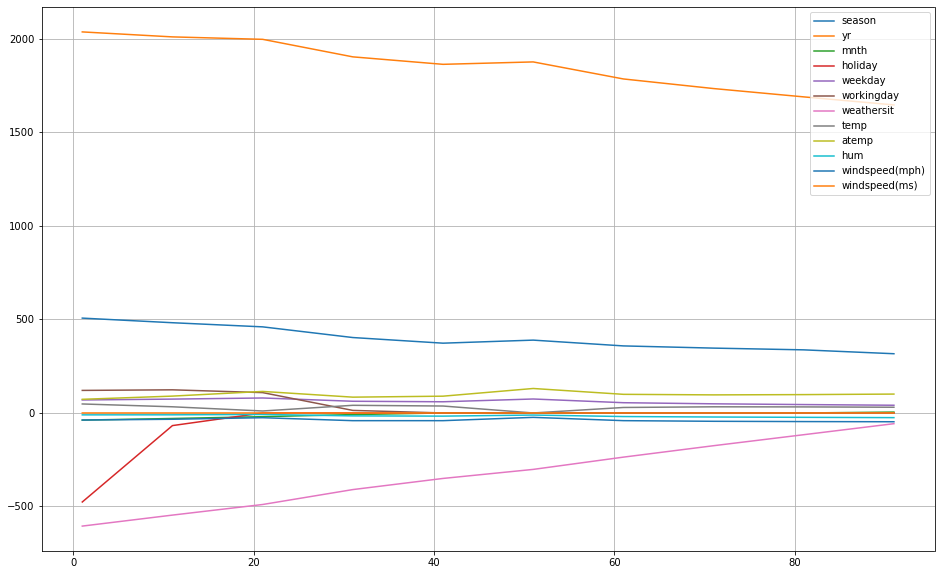

In [25]:
plt.figure(figsize=(16, 10))

for coef, feature in zip(coefs_lasso, data.columns):
    plt.plot(alphas, coef, label=feature)
    
plt.legend(loc="best")
plt.grid()
plt.show()

**Видим, что с увелечением коэффициента регуляризации все больше и больше весов обнуляются, тем самым происходит отбор признаков.**

## Кросс-валидация

**Подберем оптимальный коэффициент регуляризации при разбиение выборке на 3 фолда.**

In [53]:
from itertools import combinations
from functools import reduce

In [76]:
def cross_validation(X, y, folds=3, max_alpha=10, step=2, seed=1234):
    
    np.random.seed(seed)
    index = np.arange(X.shape[0])
    np.random.shuffle(index)
    
    X = X[index,:]
    y = y[index]
    
    alphas = np.arange(1, max_alpha, step)

    objects = np.array_split(X, folds)
    target = np.array_split(y, folds)

    mse_CV = np.zeros((len(alphas), folds))
    print(mse_CV)

    for i, alpha in enumerate(alphas):
    
        mse = []

        for item in combinations(range(folds), folds - 1):
    
            train_x = reduce(lambda a, b: np.vstack((a, b)), [objects[i] for i in item])
            train_y = reduce(lambda a, b: np.hstack((a, b)), [target[i] for i in item])
    
            test_index = ({i for i in range(folds)} - set(item)).pop()
    
            test_x = objects[test_index]
            test_y = target[test_index]
            
            
            
            reg = Lasso(alpha=alpha, max_iter=1e4)
            reg.fit(train_x, train_y)
        
            predict = reg.predict(test_x)
    
            mse.append(np.sum(np.square(predict - test_y)) / test_y.shape[0])
        
        print(mse)
        

    
        mse_CV[i, :] = mse
        print(mse_CV)
    
    return mse_CV

In [77]:
mse_path = cross_validation(X_train_corr.to_numpy(), Y_train.to_numpy(), folds=3, max_alpha=20, step=10, seed=1234)

[[0. 0. 0.]
 [0. 0. 0.]]
[866555.7172699529, 796559.099711072, 709269.2584208472]
[[866555.71726995 796559.09971107 709269.25842085]
 [     0.              0.              0.        ]]
[867183.040720789, 782157.4330609419, 709566.1668896544]
[[866555.71726995 796559.09971107 709269.25842085]
 [867183.04072079 782157.43306094 709566.16688965]]
